## Import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import mean_squared_error

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print('training data dimensions: ',np.shape(train))
print('test data dimensions: ',np.shape(test))

training data dimensions:  (1460, 81)
test data dimensions:  (1459, 80)


## Data cleaning

In [5]:
train = train.drop(['PoolQC','MiscFeature','Alley','Fence','GarageYrBlt'], axis = 1)

In [6]:
#Prevent the original data from being lost
train_filling = train.copy()
train_filling

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [7]:
train_filling.isna().sum().sort_values(ascending = False).head(20)

FireplaceQu     690
LotFrontage     259
GarageFinish     81
GarageCond       81
GarageQual       81
GarageType       81
BsmtExposure     38
BsmtFinType2     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrType        8
MasVnrArea        8
Electrical        1
RoofStyle         0
RoofMatl          0
SalePrice         0
Exterior1st       0
Exterior2nd       0
YearBuilt         0
dtype: int64

In [8]:
#deal with missing value by filling no response

filling_no_response=['FireplaceQu','GarageType','GarageCond','BsmtFinType1','BsmtQual',
               'GarageFinish','GarageQual','BsmtFinType2','BsmtCond',
               'BsmtExposure']
train_filling[filling_no_response]=train_filling[filling_no_response].fillna('no response')

In [9]:
#deal with missing value by filling the average column value
train_filling['LotFrontage'].fillna(train_filling['LotFrontage'].mean(), inplace = True)
train_filling['MasVnrArea'].fillna(train_filling['MasVnrArea'].mean(), inplace = True)

In [10]:
#deal with missing value by filling the most frequently value
train_filling['MasVnrType'].fillna(train_filling['MasVnrArea'].mode, inplace = True)
train_filling['Electrical'].fillna(train_filling['Electrical'].mode, inplace = True)

In [11]:
train_filling.isnull().sum().max() #just checking that there's no missing data missing...

0

In [12]:
#MSSubClass=The building class
train_filling['MSSubClass'] = train_filling['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
train_filling['OverallCond'] = train_filling['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
train_filling['YrSold'] = train_filling['YrSold'].astype(str)
train_filling['MoSold'] = train_filling['MoSold'].astype(str)

## Clean Test Dataset

In [13]:
#Drop MACR variables
test = test.drop(['PoolQC','MiscFeature','Alley','Fence','GarageYrBlt'], axis = 1)

In [14]:
#Prevent the original data from being lost
test_filling = test.copy()
test_filling

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


In [15]:
#deal with missing value by filling no response

filling_no_response=['FireplaceQu','GarageType','GarageCond','BsmtFinType1','BsmtQual','Utilities',
               'GarageFinish','GarageQual','BsmtFinType2','BsmtCond','Functional','Exterior1st',
               'BsmtExposure','MasVnrType','Electrical','MSZoning','Exterior2nd']
test_filling[filling_no_response]=test_filling[filling_no_response].fillna('no response')

In [16]:
#deal with missing value by filling the average column value

filling_mean=['LotFrontage','MasVnrArea','BsmtUnfSF','TotalBsmtSF','BsmtFinSF1',
               'GarageArea','BsmtFinSF2']
test_filling[filling_mean]=test_filling[filling_mean].fillna(test_filling[filling_mean].mean())

In [17]:
#deal with missing value by filling the most frequently value
test_filling['BsmtFullBath'].fillna('0.0', inplace = True)
test_filling['BsmtHalfBath'].fillna('0.0', inplace = True)
test_filling['SaleType'].fillna('WD', inplace = True)
test_filling['KitchenQual'].fillna('TA', inplace = True)
test_filling['GarageCars'].fillna('2', inplace = True)

In [18]:
test_filling.isnull().sum().max() #just checking that there's no missing data missing...

0

In [19]:
print(train_filling.shape)
print(test_filling.shape)

(1460, 76)
(1459, 75)


In [20]:
#MSSubClass=The building class
test_filling['MSSubClass'] = test_filling['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
test_filling['OverallCond'] = test_filling['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
test_filling['YrSold'] = test_filling['YrSold'].astype(str)
test_filling['MoSold'] = test_filling['MoSold'].astype(str)

## Encoding

Text(0.5, 1.0, 'Distribution of Price Before log-transformation')

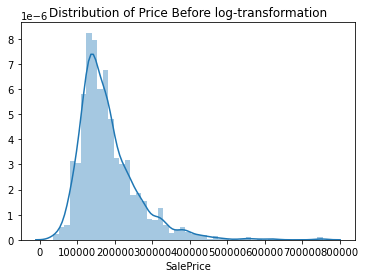

In [21]:
sns.distplot(train_filling['SalePrice']);
plt.title('Distribution of Price Before log-transformation')

- Deviate from the normal distribution.
- Have appreciable positive skewness.
- Show peakedness.

Taking the log makes the data less skewed.

Text(0.5, 1.0, 'Distribution of Price After log-transformation')

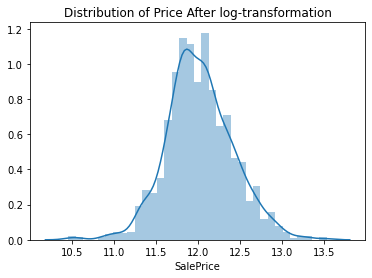

In [22]:
#log-transformation on y
log_y_train=np.log(train_filling['SalePrice'])
sns.distplot(log_y_train);
plt.title('Distribution of Price After log-transformation')

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.34550693,
         13.5211395 , 13.53447303])),
 (0.3982622308161888, 12.024050901109383, 0.9953761475636613))

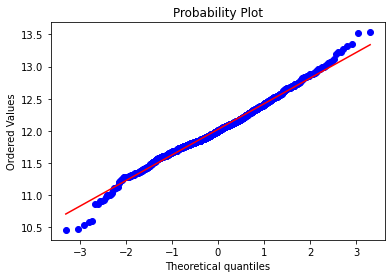

In [23]:
stats.probplot(log_y_train, plot=plt)

It's normal! GOOD

In [24]:
train_clean = train_filling.copy() 
test_clean = test_filling.copy()

<AxesSubplot:>

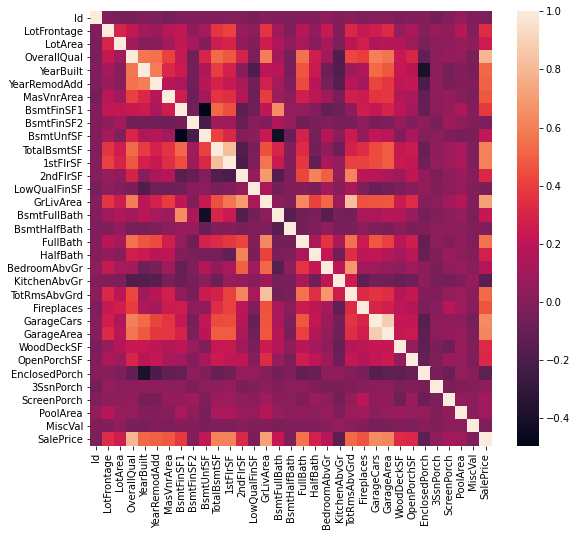

In [25]:
# Correlation Matrix
corr_matrix = train_clean.corr()

plt.figure(figsize = (9,8)) # figure size
sns.heatmap(corr_matrix)

The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'GarageX' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. 

In [26]:
n_var = 11
corr_matrix["SalePrice"].sort_values(ascending=False).head(n_var)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

I start to investigate deeper into 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt','TotRmsAbvGrd' variables, due to high correlations with SalePrice.

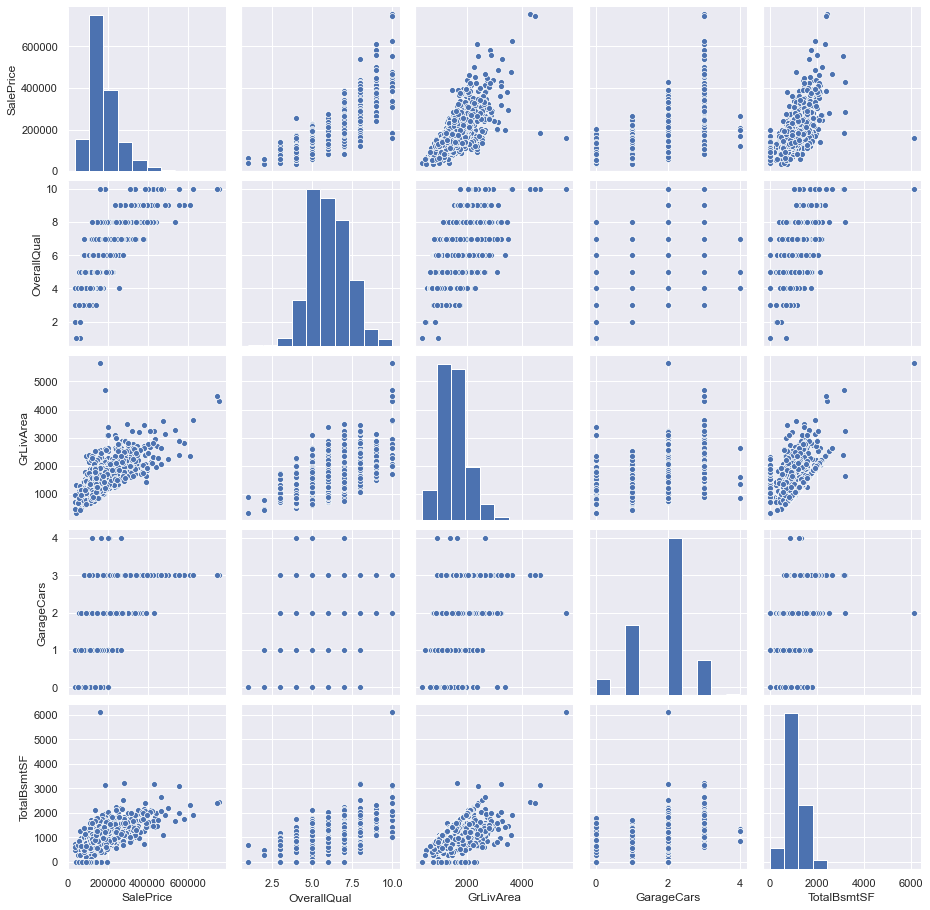

In [27]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
sns.pairplot(train_clean[cols], size = 2.5)
plt.show();

In [28]:
train_clean['GrLivArea'] = np.log(train_clean['GrLivArea'])

## Get Ready For Modelling

In [29]:
train_clean = train_clean.drop(['Id','SalePrice'], axis = 1)

In [30]:
X = pd.get_dummies(train_clean, drop_first=True)
X.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,2003,2003,196.0,706,0,150,856,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,1976,1976,0.0,978,0,284,1262,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,2001,2002,162.0,486,0,434,920,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,1915,1970,0.0,216,0,540,756,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,2000,2000,350.0,655,0,490,1145,...,0,0,0,0,1,0,0,0,1,0


In [31]:
y = log_y_train

In [32]:
X_test = test_clean.drop(['Id'], axis = 1)

In [33]:
X_test = pd.get_dummies(test_clean, drop_first=True)
X_test.head()

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,80.0,11622,5,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
1,1462,81.0,14267,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
2,1463,74.0,13830,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0
3,1464,78.0,9978,6,1998,1998,20.0,602.0,0.0,324.0,...,0,0,0,0,1,0,0,0,1,0
4,1465,43.0,5005,8,1992,1992,0.0,263.0,0.0,1017.0,...,0,0,0,0,1,0,0,0,1,0


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
scaler.fit(X_test)

X_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(X_test)

## OLS

In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_scaled,y)

LinearRegression()

In [37]:
predictions = model.predict(X_test_scaled)

In [38]:
import statsmodels.api as sm

In [39]:
# with statsmodels
#X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X_scaled).fit()
predictions = model.predict(X_test_scaled) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     80.50
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        23:50:08   Log-Likelihood:                 1431.9
No. Observations:                1460   AIC:                            -2320.
Df Residuals:                    1188   BIC:                            -882.0
Df Model:                         271                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1424      0.082      1.735      0.0

## Ridge

In [40]:
from sklearn.linear_model import RidgeCV
warnings.filterwarnings("ignore", category=DeprecationWarning) # This line of code ignores a deprecation warning

alphas = list(np.logspace(-15, 15, 151, base=2))

ridge = RidgeCV(alphas=alphas, cv=5)
ridge.fit(X_scaled, y)

RidgeCV(alphas=array([3.05175781e-05, 3.50554918e-05, 4.02681858e-05, 4.62559987e-05,
       5.31341897e-05, 6.10351562e-05, 7.01109836e-05, 8.05363715e-05,
       9.25119975e-05, 1.06268379e-04, 1.22070312e-04, 1.40221967e-04,
       1.61072743e-04, 1.85023995e-04, 2.12536759e-04, 2.44140625e-04,
       2.80443934e-04, 3.22145486e-04, 3.70047990e-04, 4.25073517e-04,
       4.88281250e-04, 5.60887869e-0...
       1.55209376e+03, 1.78288755e+03, 2.04800000e+03, 2.35253423e+03,
       2.70235220e+03, 3.10418753e+03, 3.56577511e+03, 4.09600000e+03,
       4.70506846e+03, 5.40470440e+03, 6.20837506e+03, 7.13155021e+03,
       8.19200000e+03, 9.41013692e+03, 1.08094088e+04, 1.24167501e+04,
       1.42631004e+04, 1.63840000e+04, 1.88202738e+04, 2.16188176e+04,
       2.48335002e+04, 2.85262009e+04, 3.27680000e+04]),
        cv=5)

In [41]:
acc_ridge = round(ridge.score(X_scaled, y) * 100, 2)
acc_ridge

90.52

## Lasso

In [42]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5)
lasso.fit(X_scaled, y)

LassoCV(cv=5)

In [43]:
acc_lasso = round(lasso.score(X_scaled, y) * 100, 2)
acc_lasso

78.66

## Elastic Net

In [44]:
from sklearn.linear_model import ElasticNetCV

ratio = [X*0.1 for X in range(1, 10)]
ratio.append(0.01)
ratio.append(0.99)
enet = ElasticNetCV(l1_ratio=ratio, cv=5)
enet.fit(X_scaled, y)

ElasticNetCV(cv=5,
             l1_ratio=[0.1, 0.2, 0.30000000000000004, 0.4, 0.5,
                       0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 0.01,
                       0.99])

In [45]:
acc_enet = round(enet.score(X_scaled, y) * 100, 2)
acc_enet

78.66

## XGBoost

In [46]:
from xgboost.sklearn import XGBRegressor

In [50]:
xgb_model = XGBRegressor(n_estimators=1000, max_depth=10, learning_rate=0.005, random_state=0)
xgb_model.fit(X_scaled, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.005, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
acc_xgb = round(xgb_model.score(X_scaled, y) * 100, 2)
acc_xgb

93.22

In [52]:
models = pd.DataFrame({
    'Model': ['Ridge','Lasso', 'Elastic Net', 'XGBoost'],
    'Score': [acc_ridge, acc_lasso, acc_enet, acc_xgb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,XGBoost,93.22
0,Ridge,90.52
1,Lasso,78.66
2,Elastic Net,78.66
